In [1]:
# !pip install fitter

  Created wheel for fitter: filename=fitter-1.4.0-py3-none-any.whl size=25021 sha256=1d58deab94d0aedc07804b3ba29ec992b7da58c71e9f07db85e5979e90fc44c3
  Stored in directory: c:\users\jaimepanchana\appdata\local\pip\cache\wheels\3b\8e\cb\505518075a659232287a9689543b465e2dd9fa662ac8fc8086
  Created wheel for easydev: filename=easydev-0.12.0-py3-none-any.whl size=64221 sha256=3bbccdfee25321f2e1f55650471a77fd37157485757303a603323f68daea0047
  Stored in directory: c:\users\jaimepanchana\appdata\local\pip\cache\wheels\e2\47\9f\de01f291cfde341b33383bcf1292b17d64c700d4a12b318a7d
Successfully built fitter easydev


In [1]:
import numpy as np
import pandas as pd
from scipy.stats import pearsonr

import seaborn as sns
from matplotlib import pyplot as plt

from fitter import Fitter, get_common_distributions, get_distributions

In [2]:
# !pip show fitter

In [3]:
import datetime
from binance.client import Client

from config import *
client = Client(api_key, api_secret)
td = ['genlogistic', 'loggamma', 'johnsonsb', 'argus', 'pearson3', 'genextreme', 'powerlaw', 'skewnorm', 'trapz', 'triang', 'beta', 'gausshyper', 'genhalflogistic', 'gumbel_l']
len(td)

14

In [ ]:
def get_stts(arr2):
    # arr2 = arr.copy()
    x_axis = [i for i in range(len(arr2))]
    models = []
    for i in range(2, 7):
        mymodel = np.poly1d(np.polyfit(x_axis, arr2, i))
        models.append(mymodel)

    myline = np.linspace(1, len(arr2), len(arr2))
    ys = []
    for model in models:
        y_y = model(myline)
        ys.append(y_y)
        
    V = [arr2]+ys
    corrs = []
    for v in range(len(V)):
        mini = []
        for w in range(len(V)):
            v_v = V[v]
            w_w = V[w]
            corr, _ = pearsonr(v_v, w_w)
            mini.append(corr)
        corrs.append(mini)
    arr_c = np.array(corrs)
    arr_c = arr_c[arr_c<0.9999999999999]

    f = Fitter(arr2, distributions=['triang'])
    f.fit()
    dx = f.summary(Nbest=15).loc['triang']['sumsquare_error']
    plt.close()
    
    f = Fitter(ys[0], distributions=['uniform'])
    f.fit()
    dy = f.summary(Nbest=15).loc['uniform']['sumsquare_error']
    plt.close()

    return arr_c.max(), arr_c.min(), arr_c.std(), np.std([arr_c.max(), arr_c.min()]), dx, dy

In [15]:
L = client.futures_historical_klines(symbol='BTCUSDT',
                      interval=client.KLINE_INTERVAL_1MINUTE,
                      start_str='2021-09-06 22:00:00',
                      # end_str='2021-09-12 09:00:00',
                      # end_str='2021-09-13 09:00:00',
                      limit=1500)
len(L)

10986

12636


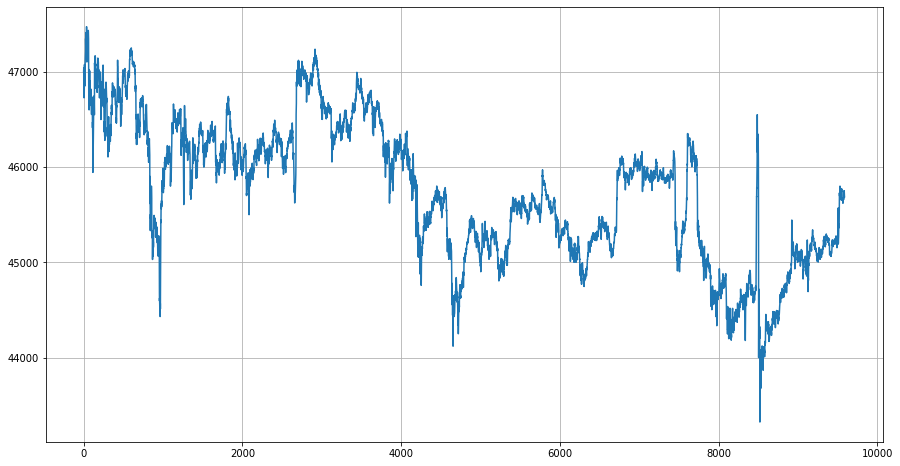

In [8]:
L1m = client.futures_historical_klines(symbol='BTCUSDT',
                      interval=client.KLINE_INTERVAL_1MINUTE,
                      start_str='2021-09-06 22:00:00',
                      # end_str='2021-09-12 09:00:00',
                      # end_str='2021-09-13 09:00:00',
                      limit=1500)
print(len(L1m))
arr = np.array(L1m, dtype=np.float)
M1 = arr[:, 3][1100:-1950]
fig = plt.figure(figsize=(15, 8))
plt.plot(M1)
plt.grid()
plt.show()

2528


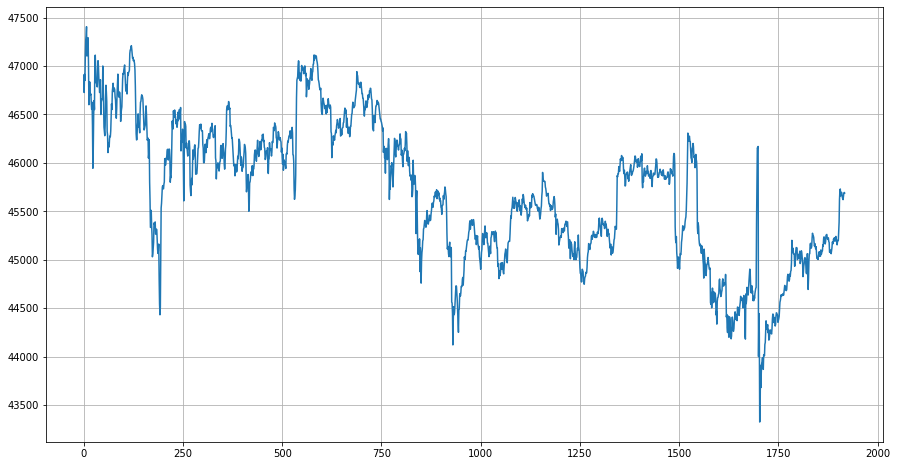

In [12]:
L2m = client.futures_historical_klines(symbol='BTCUSDT',
                      interval=client.KLINE_INTERVAL_5MINUTE,
                      start_str='2021-09-06 22:00:00',
                      # end_str='2021-09-12 09:00:00',
                      # end_str='2021-09-13 09:00:00',
                      limit=1500)
print(len(L2m))
arr = np.array(L2m, dtype=np.float)
M2 = arr[:, 3][220:-390]
fig = plt.figure(figsize=(15, 8))
plt.plot(M2)
plt.grid()
plt.show()

In [ ]:
client.KLINE_INTERVAL_15MINUTE

843


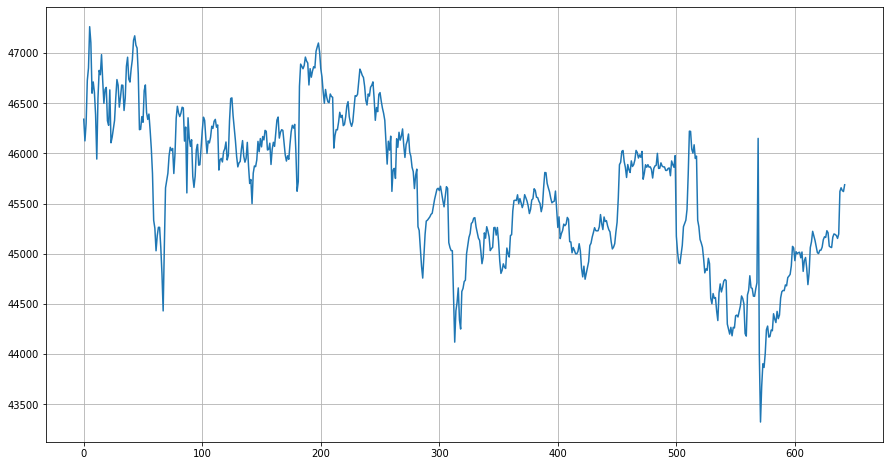

In [15]:
L3m = client.futures_historical_klines(symbol='BTCUSDT',
                      interval=client.KLINE_INTERVAL_15MINUTE,
                      start_str='2021-09-06 22:00:00',
                      # end_str='2021-09-12 09:00:00',
                      # end_str='2021-09-13 09:00:00',
                      limit=1500)
print(len(L3m))
arr = np.array(L3m, dtype=np.float)
M3 = arr[:, 3][70:-130]
fig = plt.figure(figsize=(15, 8))
plt.plot(M3)
plt.grid()
plt.show()

In [16]:
len(M1), len(M2), len(M3)

(9586, 1918, 643)

121


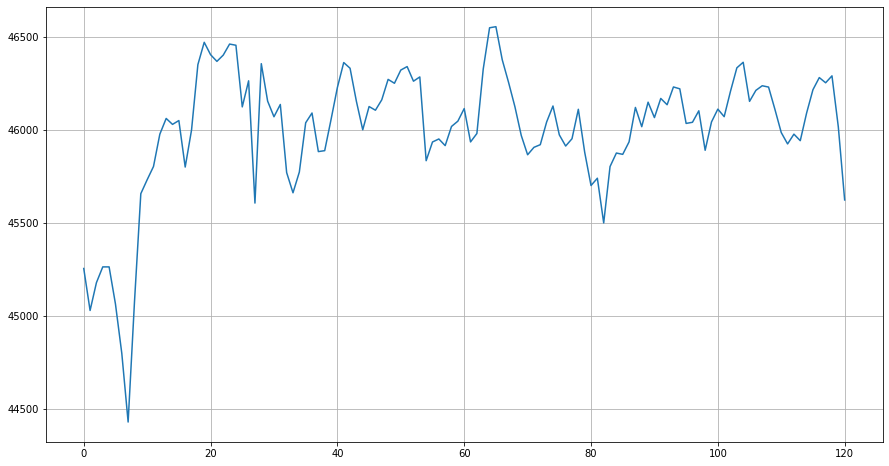

In [239]:
### 1
# 15m \|/ 25 - 74

# arr = M[750:1150] # yes 400 1m
# arr = M3[50:85] # yes 35 15m

### 2
# arr = M[300:825] # yes 525 1m
# arr = M3[23:49] # yes 26 15m

### 3
# arr = M[955:4300] # nope 3345 1m
# arr = M3[60:290] # nope 230 15m

### 4
# arr = M[5250:6300] # yes 1050 1m
# arr = M3[351:425] # yes 74 15m

### 5
# arr = M[4652:4725] # no 73 1m
# arr = M3[300:320] # no 20 15m

### 6
# arr = M[4600:4850] # yes 250 1m
# arr = M3[306:331] # yes 25 15m

### 7
# arr = M[1000:2600] # nope 1600
arr = M3[60:181] # nope 121

shape = arr.shape[0]
print(shape)

fig = plt.figure(figsize=(15, 8))
plt.plot(arr)
# plt.plot(arr5)
plt.grid()
plt.show()

In [299]:
def poly_ys(serie):
    x_axis = [i for i in range(len(serie))]
    models = []
    for i in range(2, 4):
        mymodel = np.poly1d(np.polyfit(x_axis, serie, i))
        models.append(mymodel)
    myline = np.linspace(1, len(serie), len(serie))
    y_s = []
    for model in models:
        y_y = model(myline)
        y_s.append(y_y)
    return y_s

In [300]:
def d_xy(S, tipo):
    f = Fitter(S, distributions=[tipo])
    f.fit()
    dd = f.summary(Nbest=15).loc[tipo]['sumsquare_error']
    plt.close()
    return dd

In [308]:
def get_colio(serie):
    ys = poly_ys(serie)
    V = [serie]+ys
    corrs = []
    for v in range(len(V)):
        mini = []
        for w in range(len(V)):
            v_v = V[v]
            w_w = V[w]
            corr, _ = pearsonr(v_v, w_w)
            mini.append(corr)
        corrs.append(mini)
    arr_c = np.array(corrs)
    arr_c = arr_c[arr_c<0.9999999999999]

    dx = d_xy(serie, 'triang')
    dy = d_xy(ys[0], 'uniform')
    var = np.array([dx, dy]).std()
    
    me = ys[0]
    n = len(me)//2
    first, last = me[0], me[-1]
    middle = me[n]
    gansta = ''
    if middle>first or middle>last:
        gansta = 'up'
    else:
        gansta = 'down'
    
    U = arr_c.max(), arr_c.min(), arr_c.std(), np.std([arr_c.max(), arr_c.min()]), dx, dy, var, gansta #1 yes |3
    return U

In [309]:
def operative_decision(Z):
    maxi, mini, stdg, mixstd, leemis_x, leemis_y, gansta_var, eye = get_colio(Z)
    cs = .995, .8099, .07,   .1,     .00099999
    cs = .915, .723,  .0871, .10007, .00041661, .00078376, .00022995
    c1 = maxi>cs[0]
    c2 = mini>cs[1]
    c3 = stdg<cs[2]
    c4 = mixstd<cs[3]
    c5 = leemis_x<cs[4]
    c6 = leemis_y<cs[5]
    c7 = gansta_var<cs[6]
    stts = [maxi, mini, stdg, mixstd, leemis_x, leemis_y, gansta_var]
    decs = int(np.mean([c1, c2, c3, c4, c5, c6, c7]))
    return stts, decs, eye

In [310]:
operative_decision(arr)

([0.7350039103826395,
  0.5174901300808209,
  0.0915988580141421,
  0.10875689015090928,
  3.104063188283269e-05,
  0.0004909371179306322,
  0.00022994824302389973],
 0,
 'up')

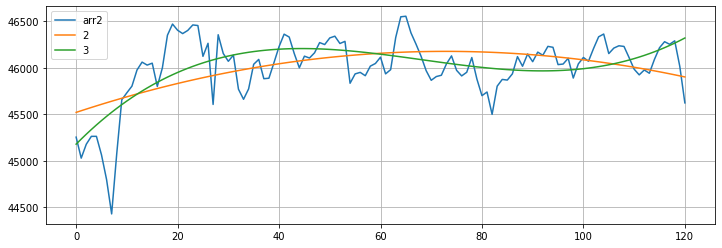

In [307]:
arr2 = arr.copy()
x_axis = [i for i in range(len(arr2))]
models = []
# for i in range(2, 7):
for i in range(2, 4):
    mymodel = np.poly1d(np.polyfit(x_axis, arr2, i))
    models.append(mymodel)

myline = np.linspace(1, len(arr2), len(arr2))
ys = []
for model in models:
    y_y = model(myline)
    ys.append(y_y)

fig = plt.figure(figsize=(12, 4))
# plt.plot(arr2)
plt.plot(arr2)
for yy in ys:
    plt.plot(yy)

plt.legend(['arr2']+list(range(2, 7)))
plt.grid()
# plt.ylim([45500, 46800])
plt.show()

In [241]:
V = [arr2]+ys
corrs = []
for v in range(len(V)):
    mini = []
    for w in range(len(V)):
        v_v = V[v]
        w_w = V[w]
        corr, _ = pearsonr(v_v, w_w)
        mini.append(corr)
    corrs.append(mini)
arr_c = np.array(corrs)
arr_c = arr_c[arr_c<0.9999999999999]

f = Fitter(arr2, distributions=['triang'])
f.fit()
dx = f.summary(Nbest=15).loc['triang']['sumsquare_error']
plt.close()

f = Fitter(ys[0], distributions=['uniform'])
f.fit()
dy = f.summary(Nbest=15).loc['uniform']['sumsquare_error']
plt.close()

arr_c

array([0.51749013, 0.67391667, 0.51749013, 0.73500391, 0.67391667,
       0.73500391])

### 15m

In [184]:
u1 = arr_c.max(), arr_c.min(), arr_c.std(), np.std([arr_c.max(), arr_c.min()]), dx, dy #1 yes |3
u1

(0.952392886752758,
 0.793027328946825,
 0.06868069727363449,
 0.07968277890296649,
 8.031189350709775e-05,
 0.00010054379427560532)

In [208]:
sum(u1[2:])/4, sum(u1[2:-1])/3, u1[-2]>u1[-1]

(0.03713608296609592, 0.049481262690036026, False)

In [189]:
u2 = arr_c.max(), arr_c.min(), arr_c.std(), np.std([arr_c.max(), arr_c.min()]), dx, dy #2 yes |3
u2

(0.9222770648924284,
 0.7221546653238056,
 0.08706814706804579,
 0.10006119978431144,
 0.0004166100600780723,
 0.000783755635327683)

In [209]:
sum(u2[2:])/4, sum(u2[2:-1])/3, u2[-2]>u2[-1]

(0.04708242813694074, 0.06251531897081176, False)

In [194]:
u3 = arr_c.max(), arr_c.min(), arr_c.std(), np.std([arr_c.max(), arr_c.min()]), dx, dy #3 no |3
u3

(0.9032917638510477,
 0.6064203964925476,
 0.12720525337412236,
 0.14843568367925003,
 9.353094191036103e-06,
 0.0001458206287498045)

In [210]:
sum(u3[2:])/4, sum(u3[2:-1])/3, u3[-2]>u3[-1]

(0.0689490276940783, 0.09188343004918781, False)

In [199]:
u4 = arr_c.max(), arr_c.min(), arr_c.std(), np.std([arr_c.max(), arr_c.min()]), dx, dy #4 yes |3
u4

(0.9839348870860567,
 0.9068920157633943,
 0.033475971731257395,
 0.038521435661331205,
 0.00015811293968999318,
 0.00020442352214568662)

In [211]:
sum(u4[2:])/4, sum(u4[2:-1])/3, u4[-2]>u4[-1]

(0.01808998596360607, 0.02405184011075953, False)

In [204]:
u5 = arr_c.max(), arr_c.min(), arr_c.std(), np.std([arr_c.max(), arr_c.min()]), dx, dy #5 no |3
u5

(0.9332452636430321,
 0.9004064753053478,
 0.014450121891562301,
 0.01641939416884214,
 0.00020445513673364161,
 0.00016127080504747647)

In [212]:
sum(u5[2:])/4, sum(u5[2:-1])/3, u5[-2]>u5[-1]

(0.007808810500546389, 0.010357990399046026, True)

In [227]:
u6 = arr_c.max(), arr_c.min(), arr_c.std(), np.std([arr_c.max(), arr_c.min()]), dx, dy #6 yes |3
u6

(0.9168717925027221,
 0.8355759161906052,
 0.0336743600166937,
 0.04064793815605844,
 0.00015810083044601498,
 0.0002373087957428797)

In [228]:
sum(u6[2:])/4, sum(u6[2:-1])/3, u6[-2]>u6[-1]

(0.018679426949735258, 0.024826799667732716, False)

In [242]:
u7 = arr_c.max(), arr_c.min(), arr_c.std(), np.std([arr_c.max(), arr_c.min()]), dx, dy #7 no |3
u7

(0.7350039103826395,
 0.5174901300808209,
 0.0915988580141421,
 0.10875689015090928,
 3.104063188283269e-05,
 0.0004909371179306322)

In [243]:
sum(u7[2:])/4, sum(u7[2:-1])/3, u7[-2]>u7[-1]

(0.05021943147871621, 0.06679559626564473, False)

In [267]:
dz = np.array([u1, u2, u3, u4, u5, u6, u7])[:, -2:]#.reshape(7, 2)
dz+1

array([[1.00008031, 1.00010054],
       [1.00041661, 1.00078376],
       [1.00000935, 1.00014582],
       [1.00015811, 1.00020442],
       [1.00020446, 1.00016127],
       [1.0001581 , 1.00023731],
       [1.00003104, 1.00049094]])

In [266]:
dz.std(axis=1).reshape(7, 1)+1

array([[1.00001012],
       [1.00018357],
       [1.00006823],
       [1.00002316],
       [1.00002159],
       [1.0000396 ],
       [1.00022995]])

In [287]:
WW = [(0.952392886752758,
 0.793027328946825,
 0.06868069727363449,
 0.07968277890296649,
 8.031189350709775e-05,
 0.00010054379427560532),
(0.9222770648924284,
 0.7221546653238056,
 0.08706814706804579,
 0.10006119978431144,
 0.0004166100600780723,
 0.000783755635327683),
 (0.9839348870860567,
 0.9068920157633943,
 0.033475971731257395,
 0.038521435661331205,
 0.00015811293968999318,
 0.00020442352214568662),
 (0.9168717925027221,
 0.8355759161906052,
 0.0336743600166937,
 0.04064793815605844,
 0.00015810083044601498,
 0.0002373087957428797)
]
WW = np.array(WW)
print(WW+1)

[[1.95239289 1.79302733 1.0686807  1.07968278 1.00008031 1.00010054]
 [1.92227706 1.72215467 1.08706815 1.1000612  1.00041661 1.00078376]
 [1.98393489 1.90689202 1.03347597 1.03852144 1.00015811 1.00020442]
 [1.91687179 1.83557592 1.03367436 1.04064794 1.0001581  1.00023731]]


In [294]:
# g = WW.min(axis=0)
g = WW.max(axis=0)
print(g+1)
# tup.min(axis=0)

[1.98393489 1.90689202 1.08706815 1.1000612  1.00041661 1.00078376]


In [ ]:
.91687179, .72215467, .08706815, .1000612, .00041661, .00078376, .00022995

### 1min

In [623]:
arr_c.max(), arr_c.min(), arr_c.std(), np.std([arr_c.max(), arr_c.min()]), dx # yes

(0.9987247010275725,
 0.8581719298230844,
 0.0387705093402362,
 0.07027638560224403,
 0.00014574814871986372)

In [718]:
arr_c.max(), arr_c.min(), arr_c.std(), np.std([arr_c.max(), arr_c.min()]), dx # yes

(0.9976254007853739,
 0.8134130931606454,
 0.06408230784905067,
 0.09210615381236426,
 0.0004650892181126851)

In [644]:
arr_c.max(), arr_c.min(), arr_c.std(), np.std([arr_c.max(), arr_c.min()]), dx # no

(0.9392067178169188,
 0.5329001435266226,
 0.13133297705819497,
 0.20315328714514808,
 0.00012671211921118488)

In [649]:
arr_c.max(), arr_c.min(), arr_c.std(), np.std([arr_c.max(), arr_c.min()]), dx # yes

(0.9957244610665752,
 0.8978766051414945,
 0.03858863749984141,
 0.04892392796254036,
 0.0005232842891828162)

In [654]:
arr_c.max(), arr_c.min(), arr_c.std(), np.std([arr_c.max(), arr_c.min()]), dx # no

(0.9997357388013621,
 0.9649127915843516,
 0.010829650753731235,
 0.017411473608505257,
 0.003704409433183401)

In [662]:
arr_c.max(), arr_c.min(), arr_c.std(), np.std([arr_c.max(), arr_c.min()]), dx # yes

(0.99933310721803,
 0.9395658215598376,
 0.020399570363316768,
 0.029883642829096224,
 0.0009338440533158837)

In [667]:
arr_c.max(), arr_c.min(), arr_c.std(), np.std([arr_c.max(), arr_c.min()]), dx # no

(0.9983020622616757,
 0.03380659889610183,
 0.2605592418374353,
 0.48224773168278695,
 0.0005980041310171286)

In [719]:
tup = [(0.9987247010275725,
 0.8581719298230844,
 0.0387705093402362,
 0.07027638560224403,
 0.00014574814871986372),
(0.9976254007853739,
 0.8134130931606454,
 0.06408230784905067,
 0.09210615381236426,
 0.0004650892181126851),
(0.9957244610665752,
 0.8978766051414945,
 0.03858863749984141,
 0.04892392796254036,
 0.0005232842891828162),
(0.99933310721803,
 0.9395658215598376,
 0.020399570363316768,
 0.029883642829096224,
 0.0009338440533158837)]
tup = np.array(tup)+1
# tup = np.around(tup, 7)
print(tup)

[[1.9987247  1.85817193 1.03877051 1.07027639 1.00014575]
 [1.9976254  1.81341309 1.06408231 1.09210615 1.00046509]
 [1.99572446 1.89787661 1.03858864 1.04892393 1.00052328]
 [1.99933311 1.93956582 1.02039957 1.02988364 1.00093384]]


In [ ]:
, 0.00099

In [722]:
tup.max(axis=0)
# tup.min(axis=0)

array([1.99933311, 1.93956582, 1.06408231, 1.09210615, 1.00093384])

In [ ]:
.995, .8099, 0.07, 0.1, 0.00099999

In [725]:
np.array([4, 2, 3]) > np.array([3, 4, 5])

array([ True, False, False])

In [726]:
c = .995, .8099, 0.07, 0.1, 0.00099999

In [727]:
c[0]

0.995

In [615]:
f = Fitter(arr2, distributions=['triang'])
f.fit()
dx = f.summary(Nbest=15).loc['triang']['sumsquare_error']
plt.close()
dx

0.003704409433183401

In [668]:
f = Fitter(arr2,
           distributions=['genlogistic', 'loggamma', 'johnsonsb',
                          'argus', 'pearson3',
                          'genextreme',
                          'powerlaw',
                          'skewnorm', 'trapz', 'triang', 'beta',
                          'gausshyper', 'genhalflogistic', 'gumbel_l',
                          'uniform',
                          'semicircular'
                         ])
f.fit()

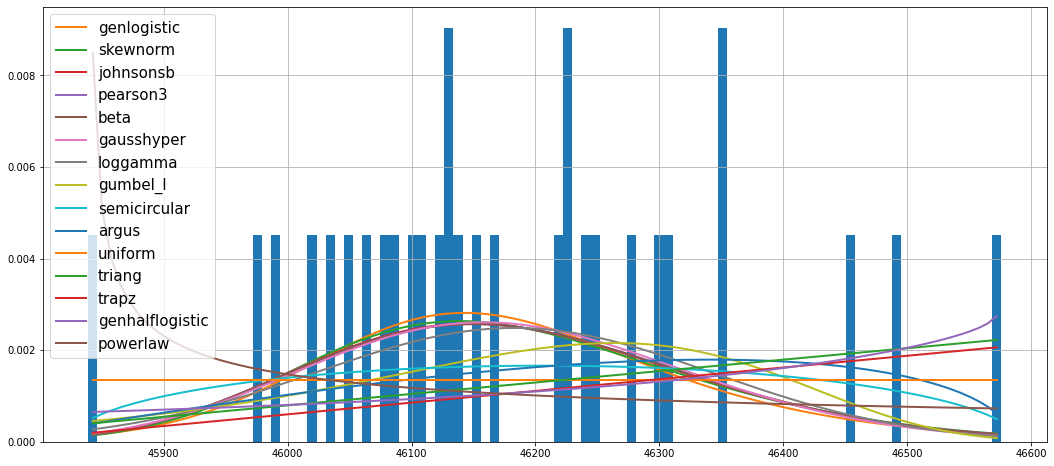

In [669]:
### x
fig = plt.figure(figsize=(18, 8))
dfx = f.summary(Nbest=15)
plt.legend(fontsize=15)
plt.show()

In [670]:
### 1 si
dfx

,sumsquare_error,aic,bic,kl_div
genlogistic,0.000477,1397.554589,-321.288821,inf
skewnorm,0.000478,1388.557528,-321.223077,inf
johnsonsb,0.000480,1389.114778,-317.704333,inf
pearson3,0.000480,1386.518840,-321.079871,inf
beta,0.000480,1388.574182,-317.677956,inf
gausshyper,0.000481,1395.964544,-310.808191,inf
loggamma,0.000488,1384.236798,-320.589925,inf
gumbel_l,0.000520,1382.536284,-322.100149,inf
semicircular,0.000525,1333.569636,-321.785866,inf
argus,0.000547,1343.667473,-317.158034,inf


In [606]:
dfx.loc['triang']['sumsquare_error']

0.003704409433183401

In [228]:
### 2
dfx

,sumsquare_error,aic,bic,kl_div
gausshyper,0.000065,1484.200843,-59321.236759,0.281780
triang,0.000069,1490.929524,-59170.851687,0.270789
genlogistic,0.000069,1543.381584,-59158.964652,0.309922
powerlaw,0.000069,1495.934668,-59158.339468,0.268419
genhalflogistic,0.000070,1473.567312,-59128.859259,0.281032
skewnorm,0.000071,1531.251663,-59063.824986,0.307194
loggamma,0.000072,1530.340320,-59043.198862,0.305209
trapz,0.000072,1512.090839,-59017.455513,0.274998
pearson3,0.000073,1523.467145,-58963.049035,0.303248
argus,0.000074,1495.386087,-58940.168045,0.291279


In [234]:
### 3
dfx

,sumsquare_error,aic,bic,kl_div
powerlaw,0.001608,1062.490653,-22074.931577,0.199413
beta,0.001938,1059.495621,-21768.608810,0.341108
johnsonsb,0.001991,1062.045165,-21725.646358,0.225279
gausshyper,0.002007,1072.113542,-21697.764303,0.162286
pearson3,0.002363,1113.737344,-21458.987807,0.231524
semicircular,0.002494,1058.272001,-21379.904487,0.236829
argus,0.002588,1062.795205,-21313.434911,0.291641
gumbel_l,0.002832,1094.755805,-21176.591398,0.255217
loggamma,0.002872,1087.693689,-21146.943698,0.249671
skewnorm,0.002878,1087.439343,-21143.540130,0.249489


In [242]:
### 3.1
dfx

,sumsquare_error,aic,bic,kl_div
uniform,1.954134e-25,896.831061,-102821.146989,-7.771562e-17
powerlaw,7.316232e-08,898.833443,-38071.217555,2.755343e-06
beta,3.188182e-07,900.835391,-35708.734954,1.200641e-05
johnsonsb,1.068161e-04,902.000668,-26405.945766,4.203163e-03
gausshyper,2.147043e-04,906.423131,-25274.146112,8.010654e-03
semicircular,6.974152e-04,905.835399,-23418.666132,2.983507e-02
loggamma,1.708530e-03,934.133769,-21977.675615,7.808589e-02
pearson3,1.716071e-03,934.116145,-21970.630059,7.843214e-02
skewnorm,1.716369e-03,934.118193,-21970.351785,7.844655e-02
gumbel_l,1.913512e-03,938.283295,-21803.762996,8.845038e-02


In [243]:
dfx.sumsquare_error+1

uniform            1.000000
powerlaw           1.000000
beta               1.000000
johnsonsb          1.000107
gausshyper         1.000215
semicircular       1.000697
loggamma           1.001709
pearson3           1.001716
skewnorm           1.001716
gumbel_l           1.001914
genlogistic        1.001914
genhalflogistic    1.001986
triang             1.002075
trapz              1.002499
argus              1.003612
Name: sumsquare_error, dtype: float64

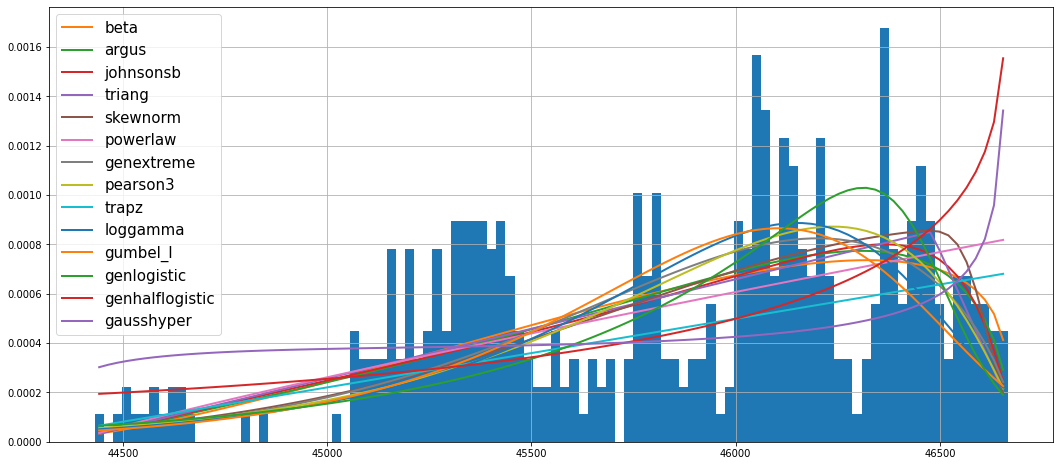

In [94]:
### 1
fig = plt.figure(figsize=(18, 8))
df1 = f.summary(Nbest=15)
plt.legend(fontsize=15)
plt.show()

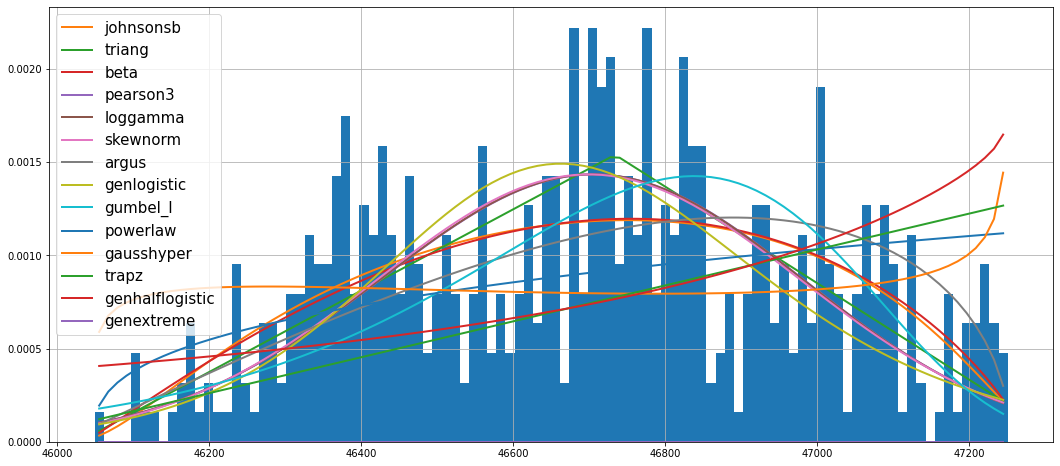

In [97]:
### 2
fig = plt.figure(figsize=(18, 8))
df2 = f.summary(Nbest=15)
plt.legend(fontsize=15)
plt.show()

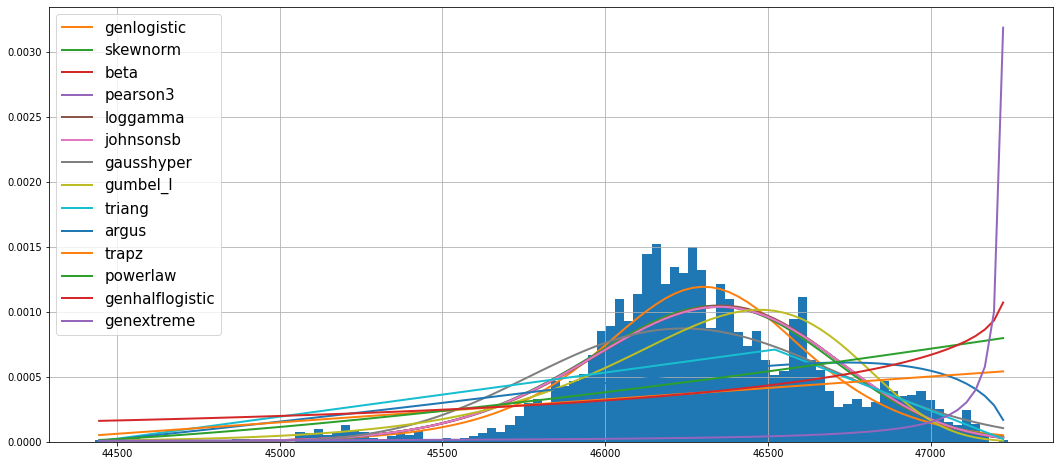

In [100]:
### 3
fig = plt.figure(figsize=(18, 8))
df3 = f.summary(Nbest=15)
plt.legend(fontsize=15)
plt.show()

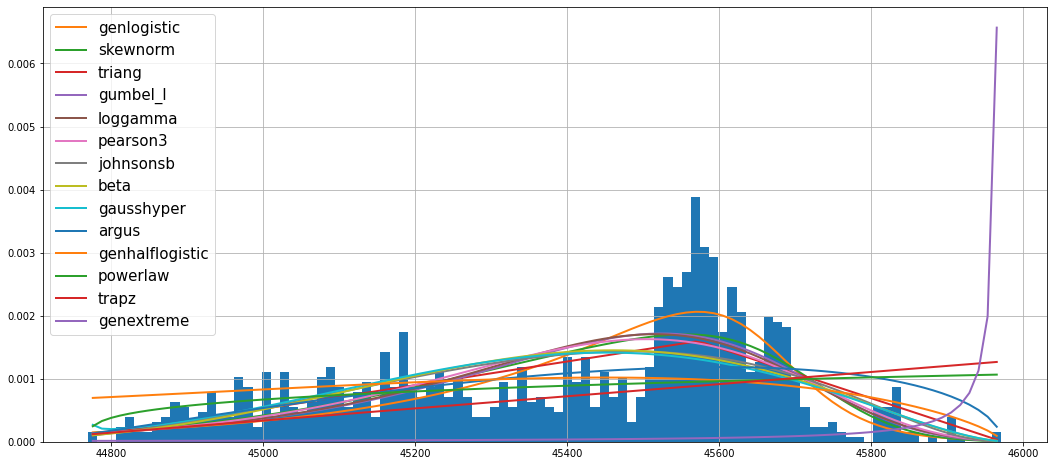

In [103]:
### 4
fig = plt.figure(figsize=(18, 8))
df4 = f.summary(Nbest=15)
plt.legend(fontsize=15)
plt.show()

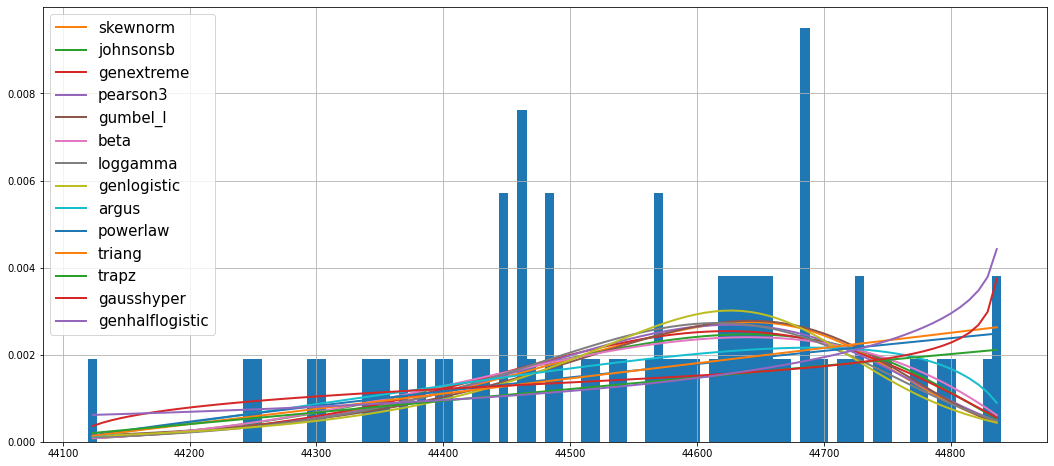

In [114]:
### 5
fig = plt.figure(figsize=(18, 8))
df5 = f.summary(Nbest=15)
plt.legend(fontsize=15)
plt.show()

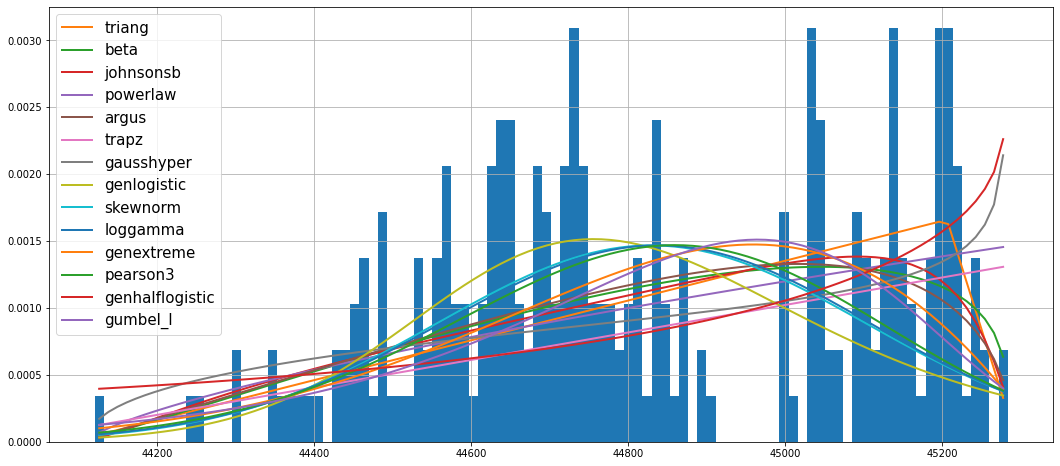

In [152]:
### 6
fig = plt.figure(figsize=(18, 8))
df6 = f.summary(Nbest=15)
plt.legend(fontsize=15)
plt.show()